In [3]:
from selenium.webdriver.common.by import By
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.support.wait import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from selenium.common.exceptions import TimeoutException
import selenium.webdriver.support.ui as ui
from selenium import webdriver
from time import sleep
import jieba
import time
import csv
import numpy as np
from fintextmin import *

In [4]:
class post:
    def __init__(self, post_class, title, contents):
        self.post_class = post_class
        self.title = title
        self.contents = contents
    
    def __str__(self):
        return self.contents

In [5]:
def scrape_post(wait, url, post_class, retry=3, timeout=10):
    for i in range(0, retry):
        driver.get(url)
        sleep(1)
        try:
            wait.until(lambda driver:EC.presence_of_element_located((By.CLASS_NAME, post_title_class_name)))
            wait.until(lambda driver:EC.presence_of_element_located((By.CLASS_NAME, content_box_class_name)))

            title = driver.find_element_by_class_name(post_title_class_name).text
            contents = driver.find_elements_by_class_name(content_box_class_name)
            return post(post_class, title, ' '.join([content.text.replace('\n', ' ') for content in contents]))
        
        except TimeoutException:
            return None
        except Exception as e:
            print(e)
            continue
    
    return None

In [6]:
post_title_class_name = r'Post_title_2O-1el'
content_box_class_name = r'Post_content_NKEl9d'

In [7]:
def scrape_subreddit(driver, subreddit_name, retry=3, timeout=10):
    """ Scrape info of all jobs related to the specified keyword
    :param keyword: google job search keyword.
    :param wait: contains timeout.
    :param urls: urls cache.
    :param start: the number of the record to start scraping.
    """
    wait = WebDriverWait(driver, timeout=timeout)
    
    # Open the subreddit
    web_url = 'https://www.dcard.tw/f/'+subreddit_name
    print(web_url)
    driver.get(web_url);
    sleep(2)
    
    wait.until(lambda driver:EC.presence_of_element_located((By.CLASS_NAME,'PostList_entry_1rq5Lf')))
    tem =driver.find_elements_by_class_name('PostList_entry_1rq5Lf')
    urls=[]
    for a in tem[:30]:
        b=a.find_elements_by_class_name('PostEntry_root_V6g0rd')
        urls.append(b[0].get_attribute('href'))
    
    return [scrape_post(wait, url, subreddit_name) for url in urls[1:]]

In [8]:
driver = webdriver.Chrome('../project/chromedriver.exe')

relationship_posts = scrape_subreddit(driver, 'relationship')
girl_posts = scrape_subreddit(driver, 'girl')
print('done')

driver.quit()

https://www.dcard.tw/f/relationship
https://www.dcard.tw/f/girl
done


In [9]:
with open('dcard_posts.csv', 'w',newline='',encoding='utf-8') as f:
    w = csv.DictWriter(f, fieldnames = ['post_class', 'title', 'contents'])
    w.writeheader()
    
    for post in relationship_posts + girl_posts:
        if post is not None:
            w.writerow(vars(post))

In [10]:
import re
import nltk
import pandas

data = pandas.read_csv('dcard_posts.csv')
data

,post_class,title,contents
0,relationship,在一起的那天晚上就%%%（微西斯,我喜歡J很久了 （剛放寒假的某天） J：欸欸我要去台中找朋友，但是那天晚上他臨時有事情，但我...
1,relationship,看到前任把合照撤下來,跟男友分開幾天了 一開始整整哭了兩天 後來維持著白天似乎過得去 但晚上關燈後就又在枕頭崩潰的...
2,relationship,女友沒有性經驗,先在這邊聲明....我沒有處女情節... 甚至，跟朋友講幹話的時候...還說過... 打死不...
3,relationship,喜歡的對象騙我身高,如題 在網上認識一位男生 覺得他個性很不錯 相處起來也滿開心的 於是就約出來見面 其實整個見...
4,relationship,男友的小心機,還沒跟男友交往前，還是處於曖昧時期 （應該是，當時候的我認為他人很好，對我沒意思之類的） 有...
5,relationship,#微西斯#做愛後的小貼心,前情提要 #更 #微西斯 做愛後的小動作 每次男友射完總是會深深的擁抱我，什麼話也不說就只是...
6,relationship,戀愛，沒有太多遺憾就好,對我來說 我們的小窩，不用很大 充滿笑聲，溫馨就好。 我們的存款，不用很多 父母老了，我們負...
7,relationship,如果身邊有人剛好追你/妳,勸世一下，身邊如果有人剛好再追你/妳，如果對方真的對您很好，或許可以考慮一下，不要像我一樣，...
8,relationship,起床後第一眼看到男友,因為我們平常是遠距離 所以能一起睡覺次數真的很少QQ 現在因為放寒假我們終於能近距離一個月...
9,relationship,你的忙讓我沒有安全感,你的工作忙碌 早上到公司晚上常常加班到12點才下班 以前的你總是訊息不斷 在一起的這五...


In [14]:
doc_names = data['title']
dwc = {key: [word for word in jieba.cut(text, cut_all=False)] for (key, text) in zip(data['title'],data['contents'])}


## [使用 fintextmin 模組]
stopwords = ['的', '是', '在', '有', '就', '...','了','和','結果','一'] 
dwc = count_words_in_documents(doc_list = data['title']+" "+data['contents'],
                              doc_names = data['title'],
                              stopwords = stopwords)

In [15]:
from collections import Counter
doc_word_frequency = {key: {i:Counter(doc)[i] for i in Counter(doc)} for key, doc in dwc.items()}
doc_word_frequency

{'#圖 #台南花喫靜苑 超棒的#浴衣體驗': {' ': 51,
  '!': 6,
  '#': 3,
  '(': 9,
  ')': 9,
  '-': 4,
  '/': 6,
  ':': 2,
  '?': 1,
  'fu': 1,
  '~': 4,
  '…': 2,
  '、': 9,
  '。': 3,
  '一人': 1,
  '一個': 1,
  '一到': 1,
  '一天': 2,
  '一家': 2,
  '一小': 1,
  '一棟': 1,
  '一段落': 1,
  '一組': 1,
  '一點': 1,
  '三個': 1,
  '上': 1,
  '下午': 2,
  '下午茶': 2,
  '不': 2,
  '不吃': 1,
  '不同': 1,
  '不會': 2,
  '不然': 1,
  '不用': 1,
  '不要': 1,
  '不錯': 4,
  '之': 1,
  '之後會': 1,
  '也': 6,
  '人': 3,
  '人超少': 1,
  '他們': 1,
  '但': 1,
  '但是': 1,
  '你': 6,
  '像': 1,
  '價格': 1,
  '先帶': 1,
  '全身': 1,
  '公休': 1,
  '其他': 1,
  '再': 1,
  '分享': 1,
  '到': 3,
  '務': 1,
  '包': 1,
  '包括': 1,
  '北路': 1,
  '區安': 1,
  '午餐': 2,
  '原價': 1,
  '去': 4,
  '取景': 1,
  '只有': 1,
  '可以': 11,
  '台南': 3,
  '台南市': 1,
  '吃': 2,
  '吧': 1,
  '周三': 1,
  '哈哈': 1,
  '啦': 1,
  '喔': 4,
  '喫': 3,
  '回去': 1,
  '因為': 1,
  '國小': 1,
  '圖': 1,
  '地址': 1,
  '場面': 1,
  '壓力': 1,
  '夕遊出': 1,
  '外加': 1,
  '多': 2,
  '大': 1,
  '大家': 1,
  '大概': 2,
  '太緊': 1,
  '夾': 1,
  '女生': 1,
  '好': 4,
  '好

In [16]:
dwf_list = [pd.DataFrame(list(doc.values()), index=doc.keys()) for doc in doc_word_frequency.values()]
wfm = pd.concat(dwf_list, axis= 1,sort=False)
wfm = np.transpose(wfm).fillna(0)
wfm.index = doc_word_frequency.keys()


puncs = set_puncs() # 因為一開始沒有清除標點符號,這邊回過頭來將它們自矩陣移除
wfm = wfm[list(set(wfm) - set(puncs))]
wfm # 詞頻矩陣完成

,停過,ㄘ,是不是,有鬼,擁抱,時開始,在我心中,愛上,點餐,抱怨,...,詢問,白紗,居然,大叫,過年,非常,萬,dolly,以前,板上
在一起的那天晚上就%%%（微西斯,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
看到前任把合照撤下來,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
女友沒有性經驗,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
喜歡的對象騙我身高,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
男友的小心機,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
#微西斯#做愛後的小貼心,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
戀愛，沒有太多遺憾就好,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
如果身邊有人剛好追你/妳,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
起床後第一眼看到男友,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
你的忙讓我沒有安全感,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,0.0


In [17]:
from sklearn import feature_extraction
from sklearn.feature_extraction.text import TfidfTransformer

## [原生 python 寫法] 
transformer = TfidfTransformer()
tfidf_gen = transformer.fit_transform(wfm) # 產生一個 tfidf 矩陣的 generator



In [18]:
from sklearn import feature_extraction
from sklearn.feature_extraction.text import TfidfTransformer

## [原生 python 寫法] 
transformer = TfidfTransformer()
tfidf_gen = transformer.fit_transform(wfm) # 產生一個 tfidf 矩陣的 generator



In [19]:
features = tfidf_gen.toarray()
labels = data['title'].values
labels

array(['在一起的那天晚上就%%%（微西斯', '看到前任把合照撤下來', '女友沒有性經驗', '喜歡的對象騙我身高', '男友的小心機',
       '#微西斯#做愛後的小貼心', '戀愛，沒有太多遺憾就好', '如果身邊有人剛好追你/妳', '起床後第一眼看到男友',
       '你的忙讓我沒有安全感', '無奈', '長途旅遊幫助認清對象', '閃光被我啪到生氣 要分手嗎？', '徵男友',
       '為什麼有些人講得出 "為什麼找這種的?這句話"', '什麼才叫是真正愛你的人', '不哭 不鬧', '總是在睡覺的男朋友',
       '藉口一堆', '參與我17歲青春的你', '大概是你來的太意外，所以走得也快。', '前任求復合🙄️', '交到警察男友很辛苦？',
       '套話技巧教學', '在無障礙廁所%%被開門', '提了分手對方卻說我們沒交往過啊', '我的16、17、18歲',
       '我愛生物系男友，我驕傲🌱', '他喜歡的人不是我', '生了小孩才發現生活很吃緊，可以讓他給人領養嗎？',
       '下輩子我一定不要當女生', '如何追到德國男友part3', '只有我覺得低收養不起小孩嗎？',
       '#精品 Gucci Marmont supermini', '阿我男友怎麼好像要讓我死', '紀念自己的青春（藝術照）',
       '不敢開車', '睡到很晚很糟糕嗎', '多久量一次體重', '多數女生身邊都會遇到的婊子~', '情侶之間沒有每天傳訊息正常嗎',
       '大家一個月的生活開銷多少？', '美甲業的咩ㄍㄚˇ', '好猶豫要不要再穿耳洞🤔', 'Anna Dolly特賣會 福利品分享',
       '不推阿華有事嗎的高領上衣', '#圖 #台南花喫靜苑 超棒的#浴衣體驗', '男友叫異性豬', '眼整形全記錄👊✨（內附圖',
       '有人闖入房間並偷看洗澡', '女生不學煮飯就是不孝', '我的初戀...', '顏文字', '做服務學習 被慈善團體主管欺負',
       '買新的機車很浪費錢嗎？', '美美的電子票證', '大胸穿衣好困擾', '男友好暖的行為(˶‾᷄ ⁻̫ ‾᷅˵)'], dtype=object)

In [20]:
import numpy as np
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
transData = pca.fit_transform(features, labels)
type(transData)
data['pca1'] = pandas.DataFrame(transData[:,0])
data['pca2'] = pandas.DataFrame(transData[:,1])
data.head()

,post_class,title,contents,pca1,pca2
0,relationship,在一起的那天晚上就%%%（微西斯,我喜歡J很久了 （剛放寒假的某天） J：欸欸我要去台中找朋友，但是那天晚上他臨時有事情，但我...,0.363133,-0.041771
1,relationship,看到前任把合照撤下來,跟男友分開幾天了 一開始整整哭了兩天 後來維持著白天似乎過得去 但晚上關燈後就又在枕頭崩潰的...,-0.066648,-0.128858
2,relationship,女友沒有性經驗,先在這邊聲明....我沒有處女情節... 甚至，跟朋友講幹話的時候...還說過... 打死不...,0.084140,-0.164329
3,relationship,喜歡的對象騙我身高,如題 在網上認識一位男生 覺得他個性很不錯 相處起來也滿開心的 於是就約出來見面 其實整個見...,0.212020,-0.086766
4,relationship,男友的小心機,還沒跟男友交往前，還是處於曖昧時期 （應該是，當時候的我認為他人很好，對我沒意思之類的） 有...,0.289442,-0.165671


In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.pairplot(x_vars=['pca1'], y_vars=['pca2'], data=data, hue="post_class", size=5)

C:\Users\Anita\Anaconda3\envs\test\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


In [22]:
textFrame = pandas.DataFrame(features, columns=list(set(wfm)))
textFrame.head()
len(features)

58

In [23]:
allF = features.flatten()
nonZero = allF[np.nonzero(allF)]
m = np.median(nonZero)

In [24]:
allF[np.nonzero(allF)]

array([ 0.02517694,  0.03524861,  0.01432411, ...,  0.11829172,
        0.22377853,  0.06418487])

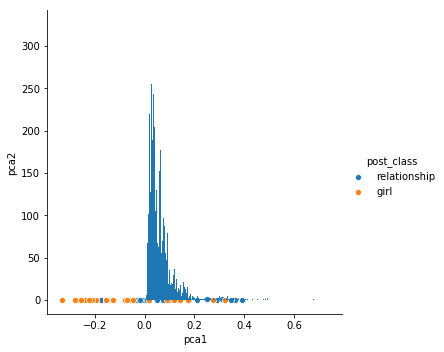

0.049315221365870167

In [25]:
plt.hist(nonZero, bins=500)
plt.show()
m

In [26]:
m = 0.1
dataset = list()
for i in range(len(features)):
    temp = textFrame.columns.values[[textFrame.iloc[i] >= m]]
    dataset.append(temp.tolist())

In [27]:
for i in range(len(features)):
    print(dataset[i])

['J', '那天', '🔺', '幾任', '讓', '\U0001f97a', '認真', '˶', '逆轉', '棉花', '冷', '本人', '面是']
['整整', '分開', '稍早', '不行', '來', '熊', '給你們', '似乎', '脫魯', '•', '眼科', '傢', '愛的', '不用', '哭過', '扣掉', '逆轉', '臉問', '某醫院', '前一晚', '源', '棉花', '做好', '用', 'see', '感情', '擦身', '沒關', '存備', '座', '另一半', '糟蹋', '朵花', '模式', '居然']
['有性', '上床', '景點', '讓', '湧上', '˶', '家裡', '相信', '新人', '小縫', '均勻', '....']
['於', '男生', '網上', '身高', '場合會', '身給', '早早', '讓', '˶', '負擔', '這麼醜', '地火', '冷戰', '節', '流', 'KINOKO', '˵', '歪理', '亂承諾', '觀念', '閒逛', '經藥']
['繼續', '持久', '讓', '湧上', '˶', '下圖', '幾天', '感謝', '忍氣', '價值觀', '第三次', '哭', '好']
['認為後戲', '然後親', '好然', '這篇文', '更', '清潔', '傳統', '點到', '學習', '沒', '只想', '失', '挑明', '兩', '😔', '˶', '稻草', '機會', '感謝', '視為', '完一波', '͜', '告知', '水族', '取景', '怎麼現', '他關', '眼罩', '決定', '招', '這些', '然後我會', '教育']
['與', '父母', 'mission', '拿藥', '亭', '分享', '貼膜', '挖', '或是', '大學後還', '至', '店裡', '好']
['考慮', '您', '那個', '忘記', '勸世', '回覆', '這', '安平古堡', '出入', '遊相處', '重視', '偷看', '同', '身給', '處問', '文長', '讓', '跟', '˶', '求學', '心想', '完一輪衝', '究竟', '完拉', '

In [28]:
# Apriori: https://rasbt.github.io/mlxtend/user_guide/frequent_patterns/apriori/
from mlxtend.preprocessing import TransactionEncoder

te = TransactionEncoder()
te_ary = te.fit(data).transform(data)
df = pd.DataFrame(te_ary, columns=te.columns_)
graph = df.T
graph.columns = list(df.index)

In [29]:
graph.head()

,0,1,2,3,4,5,6,7,8,9,...,48,49,50,51,52,53,54,55,56,57
1,False,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
_,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
a,True,False,False,True,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
c,True,False,True,True,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [30]:
from mlxtend.frequent_patterns import apriori

minsup = 0.01
result = apriori(graph, min_support=minsup)
result

,support,itemsets
0,0.615385,(0)
1,0.307692,(1)
2,0.461538,(2)
3,0.307692,(3)
4,0.307692,(4)
5,0.153846,"(0, 1)"
6,0.307692,"(0, 2)"
7,0.230769,"(0, 3)"
8,0.230769,"(0, 4)"
9,0.153846,"(1, 2)"


In [31]:
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

rules = association_rules(result, metric="confidence", min_threshold=1)
rules.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,"(2, 3)",(0),0.076923,0.615385,0.076923,1.0,1.625,0.029586,inf
1,"(2, 4)",(0),0.076923,0.615385,0.076923,1.0,1.625,0.029586,inf
2,"(0, 3)",(4),0.230769,0.307692,0.230769,1.0,3.250,0.159763,inf
3,"(0, 4)",(3),0.230769,0.307692,0.230769,1.0,3.250,0.159763,inf
4,"(3, 4)",(0),0.230769,0.615385,0.230769,1.0,1.625,0.088757,inf


In [32]:
rules = association_rules(result, metric="lift", min_threshold=4)
rules.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,"(0, 3)","(2, 4)",0.230769,0.076923,0.076923,0.333333,4.333333,0.059172,1.384615
1,"(0, 4)","(2, 3)",0.230769,0.076923,0.076923,0.333333,4.333333,0.059172,1.384615
2,"(2, 3)","(0, 4)",0.076923,0.230769,0.076923,1.000000,4.333333,0.059172,inf
3,"(2, 4)","(0, 3)",0.076923,0.230769,0.076923,1.000000,4.333333,0.059172,inf


In [33]:
rules["antecedant_len"] = rules["antecedents"].apply(lambda x: len(x))
rules.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,antecedant_len
0,"(0, 3)","(2, 4)",0.230769,0.076923,0.076923,0.333333,4.333333,0.059172,1.384615,2
1,"(0, 4)","(2, 3)",0.230769,0.076923,0.076923,0.333333,4.333333,0.059172,1.384615,2
2,"(2, 3)","(0, 4)",0.076923,0.230769,0.076923,1.000000,4.333333,0.059172,inf,2
3,"(2, 4)","(0, 3)",0.076923,0.230769,0.076923,1.000000,4.333333,0.059172,inf,2


In [34]:
out = rules[ (rules['antecedant_len'] >= 1) &
       (rules['confidence'] > 0) &
       (rules['lift'] > 1) ]
out.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,antecedant_len
0,"(0, 3)","(2, 4)",0.230769,0.076923,0.076923,0.333333,4.333333,0.059172,1.384615,2
1,"(0, 4)","(2, 3)",0.230769,0.076923,0.076923,0.333333,4.333333,0.059172,1.384615,2
2,"(2, 3)","(0, 4)",0.076923,0.230769,0.076923,1.000000,4.333333,0.059172,inf,2
3,"(2, 4)","(0, 3)",0.076923,0.230769,0.076923,1.000000,4.333333,0.059172,inf,2


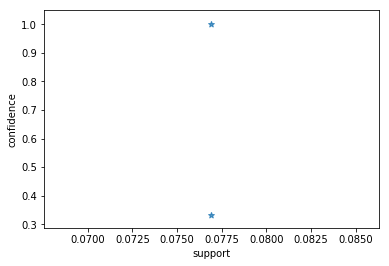

In [35]:
support = rules['support']
confidence = rules['confidence']
plt.scatter(support, confidence, alpha=0.5, marker="*")
plt.xlabel('support')
plt.ylabel('confidence') 
plt.show()

In [36]:
len(rules)
rules['antecedents'].head()

0    (0, 3)
1    (0, 4)
2    (2, 3)
3    (2, 4)
Name: antecedents, dtype: object

In [37]:
import networkx as nx
G = nx.DiGraph()
for i in range(len(df)):
    G.add_node(i)
for i in range(len(rules['antecedents'])):
    currentFrom = list(rules['antecedents'][i])
    currentTo = list(rules['consequents'][i])
    for j in range(len(currentFrom)):
        G.add_edge(currentFrom[j], currentTo[0])

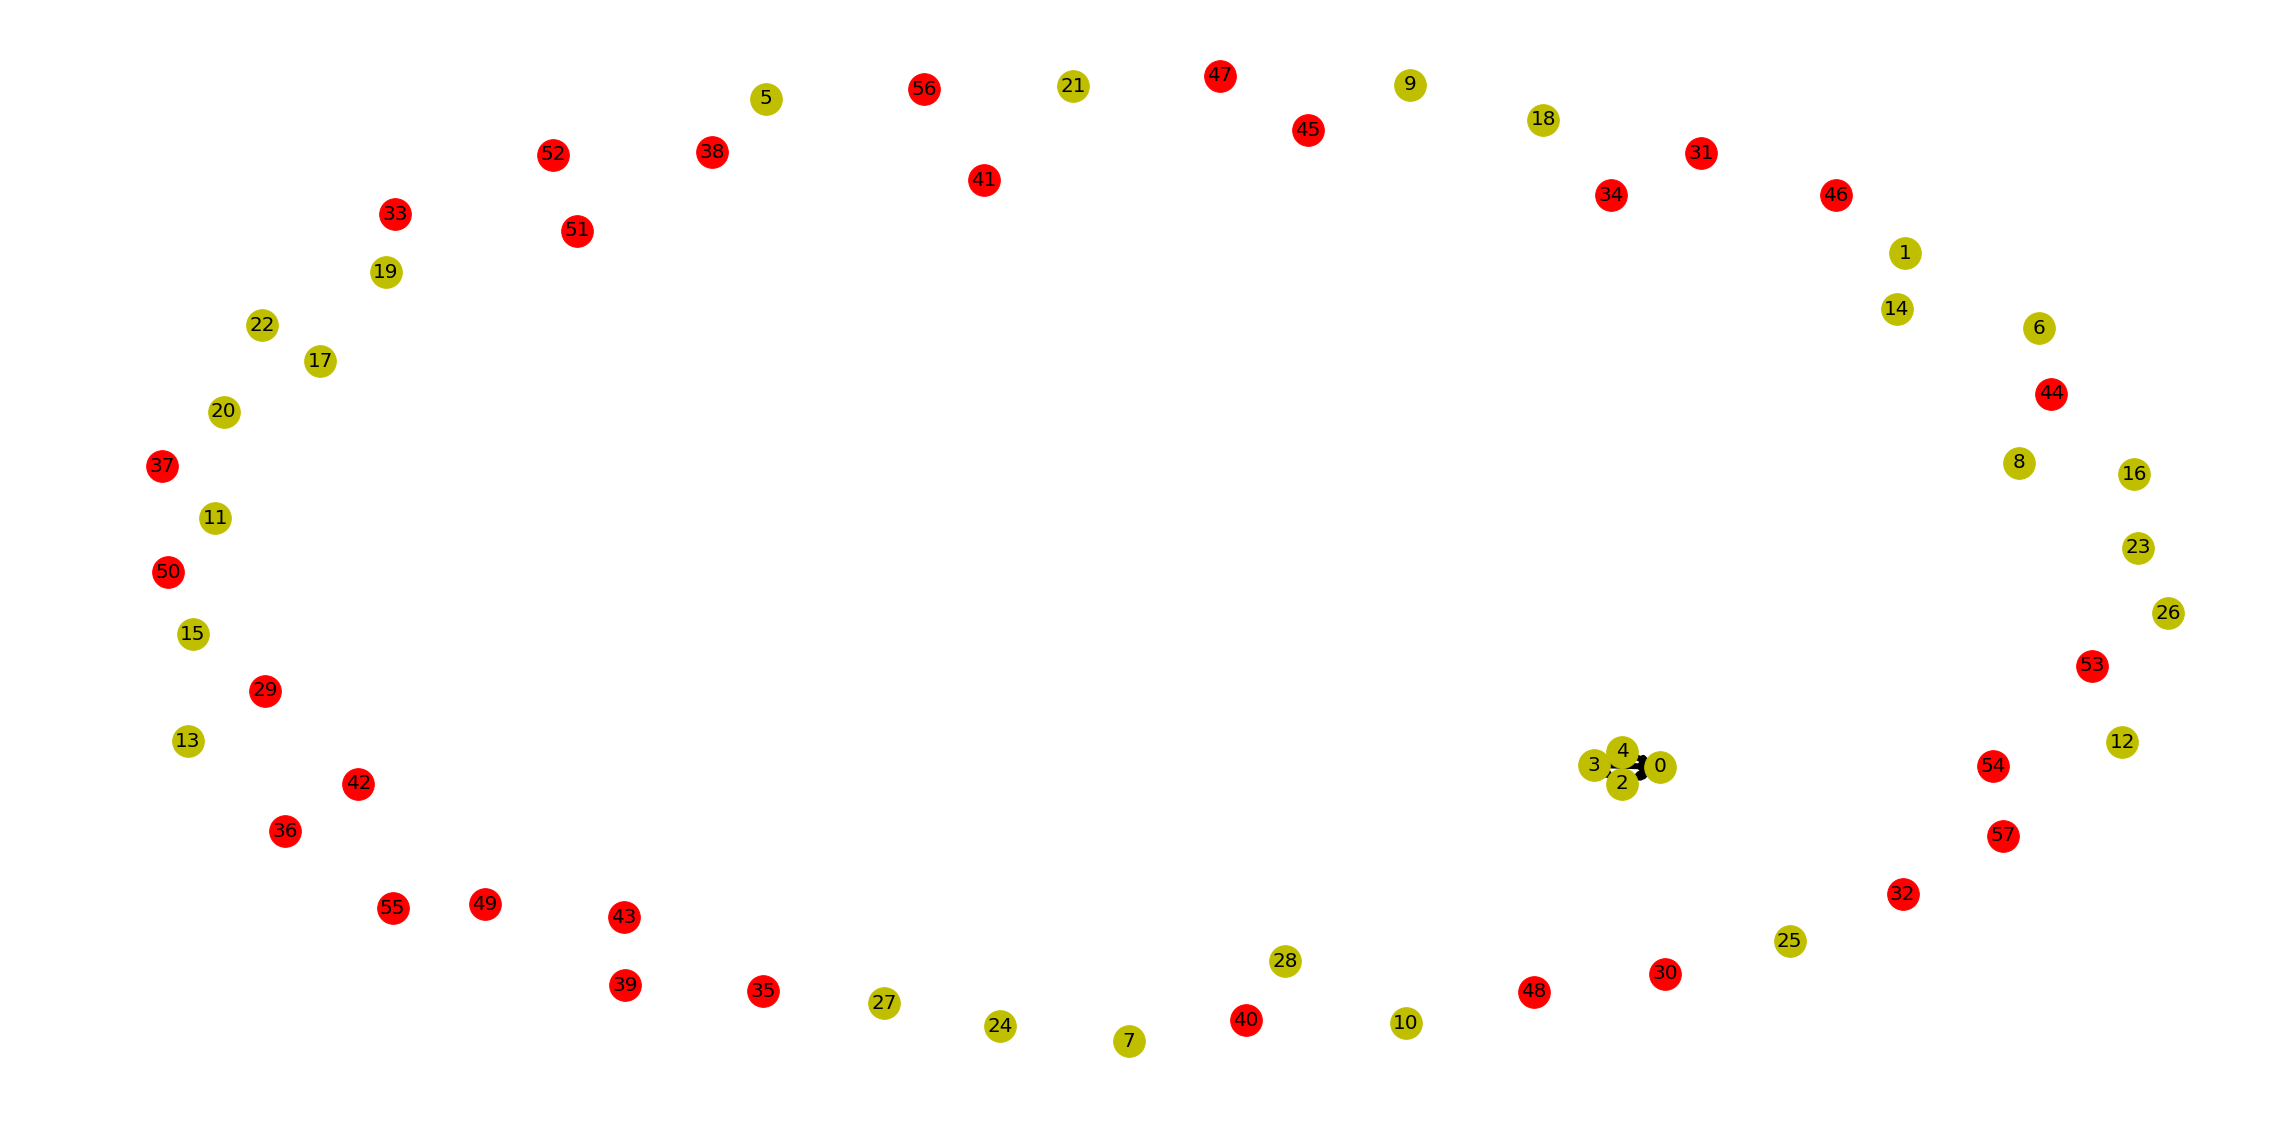

In [38]:
nodeListA = df.index[data['post_class'] == 'relationship'].tolist()
nodeListB = df.index[data['post_class'] == 'girl'].tolist()

plt.figure(figsize=(40,20))

# positions for all nodes
pos = nx.fruchterman_reingold_layout(G)

# nodes
nx.draw_networkx_nodes(G, pos, nodelist=nodeListA, node_color="y", node_size=1000)
nx.draw_networkx_nodes(G, pos, nodelist=nodeListB, node_color="r", node_size=1000)
nx.draw_networkx_edges(G, pos, width=6)

# labels
nx.draw_networkx_labels(G,pos,font_size=20,font_family='sans-serif')

plt.axis('off')
plt.savefig("weighted_graph.png") # save as png
plt.show() # display


In [39]:
print(list(nx.isolates(G)))

[1, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57]


In [40]:
from networkx.algorithms.approximation import dominating_set
dominating_set.min_edge_dominating_set(G)

{(0, 2)}

In [41]:
pandas.DataFrame(data['title'])

,title
0,在一起的那天晚上就%%%（微西斯
1,看到前任把合照撤下來
2,女友沒有性經驗
3,喜歡的對象騙我身高
4,男友的小心機
5,#微西斯#做愛後的小貼心
6,戀愛，沒有太多遺憾就好
7,如果身邊有人剛好追你/妳
8,起床後第一眼看到男友
9,你的忙讓我沒有安全感
